## About the dataset

*This data is from Kaggle and has information about people on the Titanic ship. The goal is to guess if passengers 
survived or not using certain details about them. In this 1 indicates that the passenger survived.*

_Dataset consists of following variables:_

* PassengerId : PassengerId
* Survived: Weather Survived or not: 0 = No, 1 = Yes
* Pclass: Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
* Name : Name of the Passenger
* Sex : Gender
* Age : Age in Years
* SibSp : No. of siblings / spouses aboard the Titanic
* Parch : No. of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare : Passenger fare
* Cabin : Cabin number
* Embarked : Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton

*Dataset Link*: https://www.kaggle.com/datasets/yasserh/titanic-dataset

## Problem Statement

*To predict Survival and Non-Survival of Passengers*

## Importing all necessary Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Processing

In [2]:
#Reading the CSV file
titanic_data=pd.read_csv("titanic.csv")

#Printing the first 5 rows of the data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Checking for the rows & columns and if there any null values
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***
*There are 891 rows and 12 columns in which **"Age","Cabin"** and **"Embarked"** column contains null values and also different datatypes*
***

In [4]:
#Checking for the number of Missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***
*In the above output we can see that **"Age", "Cabin"** and **"Embarked"** contains missing values* 

    * Drop the "Cabin" column as it contains maximum missing values
    * Fill the "Age" column with mean age with the help of (.fillna)
    * Missing values of the "Embarked" column will be droped using (.dropna)
***

In [5]:
#Droping the "Cabin" column as it contains maximum missing values
titanic_data.drop("Cabin",axis=1,inplace=True)

In [6]:
#Filling average age in "Age" column as null values are less 
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [7]:
#Droping the null values from "Embarked" column
titanic_data.dropna(inplace=True)

In [8]:
#Droping unnecesarry columns
titanic_data.drop(["PassengerId","Name","Ticket","Fare"],axis=1,inplace=True)

In [9]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [10]:
#Checking ount of every column
for i in titanic_data.columns:
    print(titanic_data[i].value_counts())
    print("===========")

Survived
0    549
1    340
Name: count, dtype: int64
Pclass
3    491
1    214
2    184
Name: count, dtype: int64
Sex
male      577
female    312
Name: count, dtype: int64
Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64
SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## Analysing Data through different Graphs

In [11]:
#Count of Survived Passengers
titanic_data["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

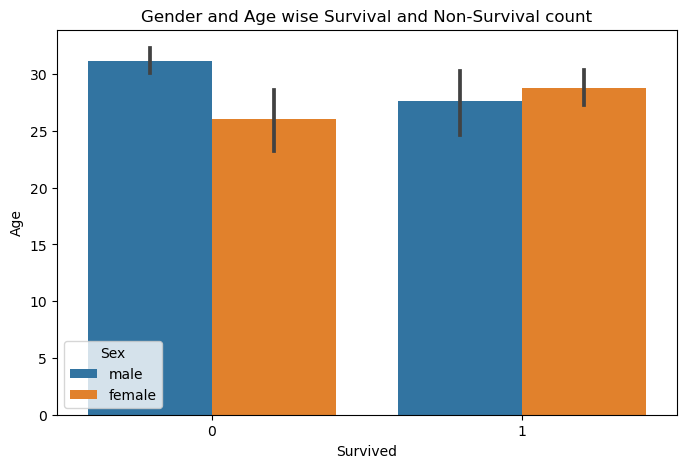

In [12]:
#Survival and Non-Survvival Count of male and female using BarPlot
plt.figure(figsize=(8,5))
sns.barplot(data=titanic_data,x='Survived',y='Age',hue='Sex')
plt.title("Gender and Age wise Survival and Non-Survival count")
plt.show()

***
*In the above output we can see that the count of **male survival** is **less** than **female survival***
***

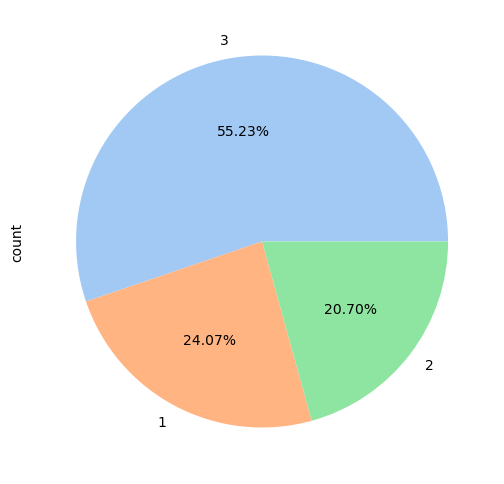

In [13]:
#Analysing class wise passengers
plt.figure(figsize=(6,7))
color=sns.color_palette('pastel')
titanic_data['Pclass'].value_counts().plot.pie(autopct='%1.2f%%',colors=color)
plt.show()

***
*We can see that maximum passegers are from class 3 i.e. **55.23%***
***

<Figure size 600x400 with 0 Axes>

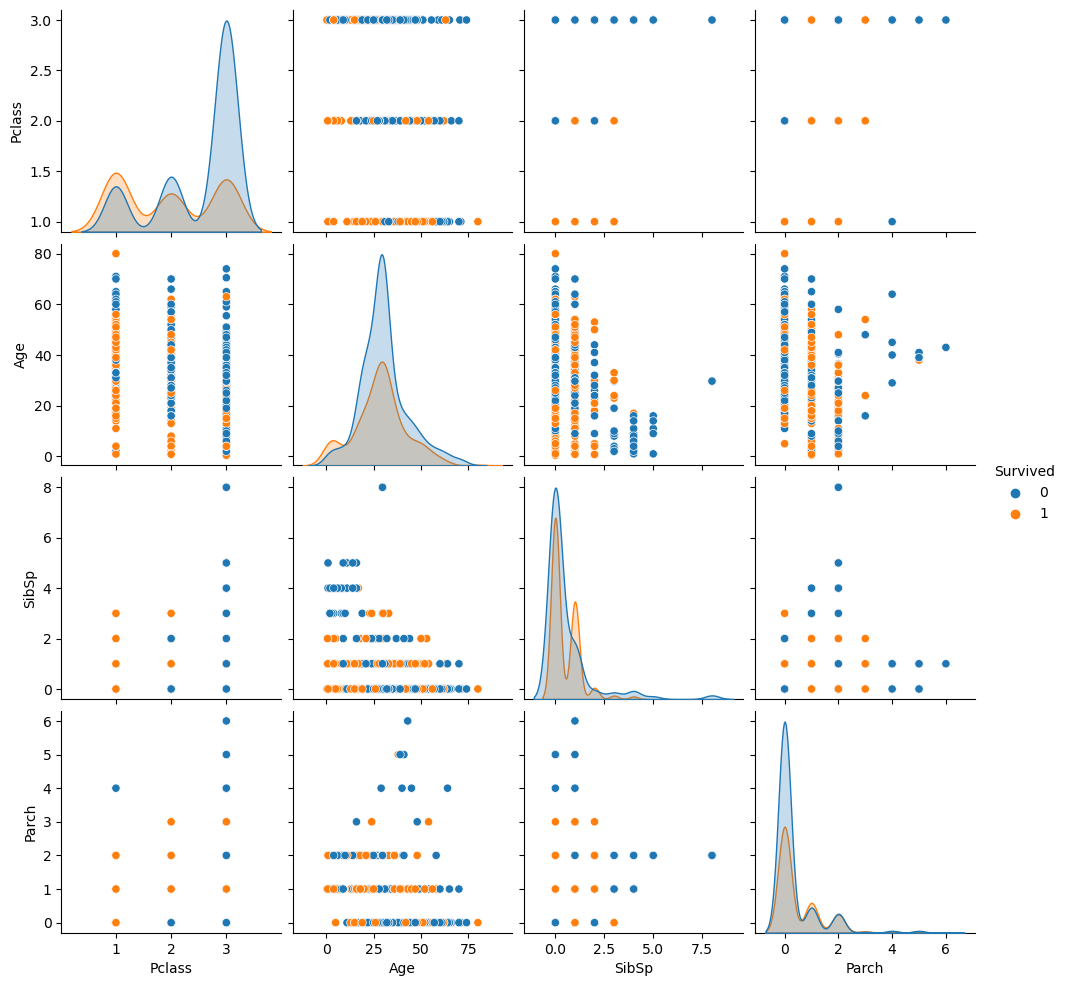

In [14]:
#Number of passengers Survived 
plt.figure(figsize=(6,4))
sns.pairplot(titanic_data,hue="Survived")
plt.show()

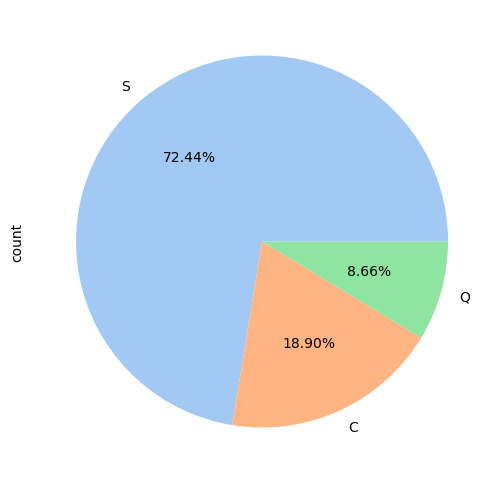

In [15]:
#Analysing class wise passengers
plt.figure(figsize=(6,7))
color=sns.color_palette('pastel')
titanic_data['Embarked'].value_counts().plot.pie(autopct='%1.2f%%',colors=color)
plt.show()

***
_We observe that the highest proportion of passengers, accounting for **72.44%**, embarked from **Southampton**, marked as **"S"** in the dataset_
***

## Separating Data into X and Y

In [16]:
#Separating X and Y
x=titanic_data.iloc[:,1:]
y=titanic_data['Survived']

In [17]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.000000,1,0,S
1,1,female,38.000000,1,0,C
2,3,female,26.000000,0,0,S
3,1,female,35.000000,1,0,S
4,3,male,35.000000,0,0,S
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,S
887,1,female,19.000000,0,0,S
888,3,female,29.699118,1,2,S
889,1,male,26.000000,0,0,C


## Encoding Categorical columns into Numerical columns

In [18]:
#Checking the total count of 'Sex' and 'Embarked' column
print(x["Sex"].value_counts())
print(x["Embarked"].value_counts())

Sex
male      577
female    312
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [19]:
#Replacing catogorical values with numerical values
x["Sex"]=x["Sex"].replace({'male':0,'female':1})
x["Embarked"]=x["Embarked"].replace({'S':0,'C':1,'Q':2})

In [20]:
x

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [21]:
#Correlation between the columns
x.corr().style.background_gradient(cmap='YlGnBu')

,Pclass,Sex,Age,SibSp,Parch,Embarked
Pclass,1.000000,-0.127741,-0.327954,0.081656,0.016824,0.043835
Sex,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.118593
Age,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.009499
SibSp,0.081656,0.116348,-0.231875,1.000000,0.414542,-0.060606
Parch,0.016824,0.247508,-0.178232,0.414542,1.000000,-0.079320
Embarked,0.043835,0.118593,0.009499,-0.060606,-0.079320,1.000000


## Splitting the Data into Train and Test

In [22]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

#Splitting the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.17,random_state=69)

In [23]:
print(x.shape,xtrain.shape,xtest.shape)

(889, 6) (737, 6) (152, 6)


## Scaling down the values

In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain))
xtest = pd.DataFrame(ss.transform(xtest))

In [25]:
xtrain

,0,1,2,3,4,5
0,-0.366887,-0.755929,-0.358995,-0.480564,-0.481913,-0.573213
1,0.834871,-0.755929,0.013757,-0.480564,-0.481913,-0.573213
2,-1.568645,-0.755929,0.013757,-0.480564,-0.481913,-0.573213
3,0.834871,-0.755929,-0.121024,-0.480564,-0.481913,-0.573213
4,0.834871,1.322876,0.116948,0.420646,0.755612,-0.573213
...,...,...,...,...,...,...
732,-0.366887,1.322876,1.227482,0.420646,0.755612,-0.573213
733,0.834871,-0.755929,1.148158,-0.480564,-0.481913,-0.573213
734,0.834871,-0.755929,-0.200348,0.420646,-0.481913,0.997263
735,0.834871,-0.755929,-0.914263,-0.480564,-0.481913,-0.573213


## Model Building

In [26]:
#Importing K-Nearest Neighbor and Metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
#Assigning a variable to the model
svm=SVC()

#Training the model
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [28]:
ac=round(accuracy_score(ytest,ypred)*100,2)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy Score: {ac}% \n ---------- \n Confusion Matrix {cm} \n ---------- \n Classification Report {cr}')

Accuracy Score: 88.16% 
 ---------- 
 Confusion Matrix [[98  8]
 [10 36]] 
 ---------- 
 Classification Report               precision    recall  f1-score   support

           0       0.91      0.92      0.92       106
           1       0.82      0.78      0.80        46

    accuracy                           0.88       152
   macro avg       0.86      0.85      0.86       152
weighted avg       0.88      0.88      0.88       152



## Hypertunning using GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[1,10],"gamma":[1,10],"kernel":["rbf"]}
g=GridSearchCV(svm,param_grid,verbose=3)
g.fit(xtrain,ytrain)
ypred=g.predict(xtest)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.777 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.723 total time=   0.0s
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.741 total time=   0.0s
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.769 total time=   0.0s
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.741 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

In [30]:
# Best parameters
print("Best Score: ", g.best_score_) 
print("Best Parameters: ", g.best_params_)

Best Score:  0.7964791321934179
Best Parameters:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [31]:
#Evaluating model for best parameters
svm=g.best_estimator_
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       106
           1       0.76      0.76      0.76        46

    accuracy                           0.86       152
   macro avg       0.83      0.83      0.83       152
weighted avg       0.86      0.86      0.86       152



In [32]:
# Evaluating model using sklearn metrics
ac=round(accuracy_score(ytest,ypred)*100,2)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy Score: {ac}% \n ---------- \n Confusion Matrix {cm} \n ---------- \n Classification Report {cr}')

Accuracy Score: 85.53% 
 ---------- 
 Confusion Matrix [[95 11]
 [11 35]] 
 ---------- 
 Classification Report               precision    recall  f1-score   support

           0       0.90      0.90      0.90       106
           1       0.76      0.76      0.76        46

    accuracy                           0.86       152
   macro avg       0.83      0.83      0.83       152
weighted avg       0.86      0.86      0.86       152



# Accuracy of this model is 85.53%